## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 和 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [3]:
#鄉對路徑
df_train = pd.read_csv("./Titanic_train.csv")

In [5]:
a = df_train.isnull().sum()
print(a)
#print("\n")

#missing_vals = df_train.isnull().sum()/len(df_train)
#print(missing_vals)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


In [7]:
# 細看遺失資料的樣態

data=df_train[['Sex','Age','Pclass']]
missing_index=data.isnull()
display(data[missing_index.values==True])

,Sex,Age,Pclass
5,male,NaN,3
17,male,NaN,2
19,female,NaN,3
26,male,NaN,3
28,female,NaN,3
...,...,...,...
859,male,NaN,3
863,female,NaN,3
868,male,NaN,3
878,male,NaN,3


## 觀察 Age

29.69911764705882
14.526497332334044


C:\Users\vincentLee1231995\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


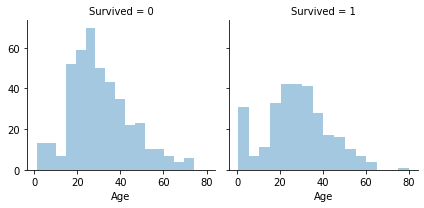

In [8]:
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差

# 連續型用分布圖來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

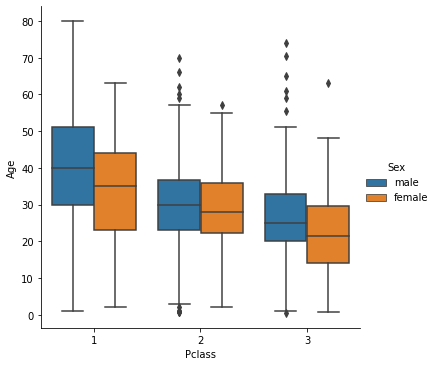

In [9]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")

#男生女生的身高特性有差異
# 觀察到不同艙等的年紀不太相同

## 我們試著用 Pclass和 Sex 來透過 KNN 來補值

In [ ]:
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#透過 preprocessing 轉換 Pclass和 Sex

from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale=0.

le = preprocessing.LabelEncoder()

df_train['Pclass']=le.fit_transform(df_train['Pclass'])
df_train['Sex']=le.fit_transform(df_train['Sex'])

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data=df_train[['Sex','Age','Pclass']]

# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1

from sklearn.impute import KNNImputer
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

imputer = KNNImputer(n_neighbors=value_neighbors,
                     weights='distance')

df_filled = pd.DataFrame(imputer.fit_transform(data)) #把資料放進去，進行補值

display(data[missing_index.values==True]) #只呈現有遺失值的資料

display(df_filled[missing_index.values==True]) #只呈現有遺失值的資料-呈現補值的結果

,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
...,...,...,...
859,1,NaN,2
863,0,NaN,2
868,1,NaN,2
878,1,NaN,2


,0,1,2
5,1.0,22.0,2.0
17,1.0,35.0,1.0
19,0.0,26.0,2.0
26,1.0,22.0,2.0
28,0.0,26.0,2.0
...,...,...,...
859,1.0,22.0,2.0
863,0.0,26.0,2.0
868,1.0,22.0,2.0
878,1.0,22.0,2.0
